# RISK

## Game Rules
### Objective:
To become the dominant world power.

### Equipments:
- 3 red dice for the attacker
- 3 blue dice for the defender
- 42 territory cards
- Troops (Number of troops limited only for the game setup but not for the game play)
Not included in the current version:
- 42 risk cards with symbols (Infantry, Calvalry, Artillery)
- 14 mission cards

### Game Setup:
1. Choose the number of players (2-6), and set up with their names.
2. The number of troops for each player is determined by the number of players.
3. If 2 players is selected a 'neutral' player  will be added to the board, with troops distributed to defended neutral territories.
4. Distribute all the territories randomly to the players and place one troop on the territory.
5. The remaining troops are randomly assigned to the player's terrritories.
6. Randomise the order of players


### Game Play
This is a turn based game, in each turn the player has 3 phases:
1. Reinforment
2. Attack
3. Manoeuvre

        
#### Phase I: Reinforcement
Player are given extra troops to dispatch onto the owned territories. Therea are 2 ways to obtain troops to reinforce the army:
- 1 troop for every 3 territories owned.
- Bonus troops if you own a whole continent, the number is dependent on which continent owned.
    
#### Phase II: Attack 
Player can initiate an attack as often as possible.
Player announce which territory the troop will be deployed from and attack atttacks which territory, and the number of troops to commit for the attack.

An attack is only possible when the below conditions are met:
- The atttacking territory is occupied by the player.
- The two territories are neighbours.
- The destination territory does not belong to the player.
- The originated territory must have at least 1 troop stationed behind.
  
    ##### The combat:
    - Attacker rolls the 3 red dice and the defender rolls the 3 blue dice to decide the fate of their troops committed into the battle.
    - The side with the higher number of dice added together wins, and the loser will use a troop.
    - The combat automatically continues until "last man standing", either attacker successfully conquered the territory and move in with the surviving troops; or defender successfully killed off all the attacking troops and remain stationed with the surviving troops

#### Phase III: Manoeuvre
Player can move troops from one (and only one) of territories into one (and only one) of the adjacent territories belonged to the current player.
The manoeuvre has to respect the "cannot empty territory rule".
    
### End Game
Conquer 30 territories

# Librairies

In [1]:
import random
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, Markdown, display

# Initial map of the game

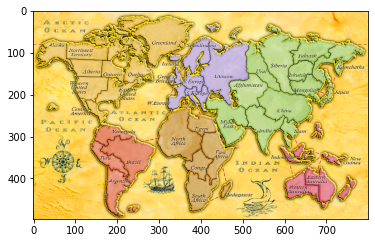

In [2]:
# Display map of territories
img=plt.imread("./risk.PNG")
plt.imshow(img)

# Game information 

In [3]:
#dictionary: territory_id and its name     
territory_id={
    1: "Alaska", 2: "Alberta", 3: "Central America", 4: "Eastern United States", 5: "Greenland",
    6: "Northwest Territory", 7: "Ontario", 8: "Quebec", 9: "Western United States",10: "Argentina", 
    11: "Brazil", 12: "Peru", 13: "Venezuela", 14: "Great Britain", 15: "Iceland", 
    16: "Northern Europe", 17: "Scandinavia", 18: "Southern Europe", 19: "Ukraine", 20: "Western Europe",
    21: "Congo", 22: "East Africa", 23: "Egypt", 24: "Madagascar", 25: "North Africa",
    26: "South Africa", 27: "Afghanistan", 28: "China", 29: "India", 30: "Irkutsk",
    31: "Japan", 32: "Kamchatka", 33: "Middle East", 34: "Mongolia", 35: "Siam ",
    36: "Siberia", 37: "Ural", 38: "Yakutsk", 39: "Eastern Australia", 40: "Indonesia",
    41: "New Guinea",42: "Western Australia"
} 

In [4]:
#Dictionnary: list of continents with the territories in each continent
continent_id={
    "North America":  [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "South America": [10, 11, 12, 13],
    "Europe": [14, 15, 16, 17, 18, 19, 20],
    "Africa": [21, 22, 23, 24, 25, 26],
    "Asia": [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38],
    "Australia": [39, 40, 41, 42]    
}

In [5]:
    #Dictionnary: list of the territories with the borders (neighbour territories)
neighbour_id={
    1: [2, 6, 32],
    2: [1, 6, 7, 9],
    3: [4, 9, 13],
    4: [3, 7, 8, 9],
    5: [6, 7, 8, 15],
    6: [1, 2, 5, 7],
    7: [2, 4, 5, 6, 8, 9],
    8: [4, 5, 7],
    9: [2, 3, 4, 7],
    10: [11, 12],
    11: [10, 12, 13, 25],
    12: [10, 11, 13],
    13: [3, 11, 12],
    14: [15, 16, 17, 20],
    15: [5, 14, 17],
    16: [14, 17, 18, 19, 20],
    17: [14, 15, 16, 19],
    18: [16, 19, 20, 23, 25, 33],
    19: [16, 17, 27, 33, 37],
    20: [14, 16, 18, 25],
    21: [22, 25, 26],
    22: [21, 23, 24, 25, 26, 33],
    23: [18, 22, 25, 33],
    24: [22, 26],
    25: [11, 18, 20, 21, 22, 23],
    26: [21, 22, 24],
    27: [19, 28, 29, 33, 37],
    28: [27, 29, 34, 35, 36, 37],
    29: [27, 28, 33, 35],
    30: [32, 34, 36, 38],
    31: [32, 34],
    32: [1, 30, 31, 34, 38],
    33: [18, 19, 22, 23, 27, 29],
    34: [28, 30, 31, 32, 36],
    35: [28, 29, 40],
    36: [28, 30, 34, 37, 38],
    37: [19, 27, 28, 36],
    38: [30, 32, 36],
    39: [41, 42],
    40: [35, 41, 42],
    41: [39, 40, 42],
    42: [39, 40, 41]
}

In [6]:
# dictionary: territory_id and its coordinate on the map.
territory_coordinates = {1: (55, 96),2: (129, 129),3: (151, 245),4: (189, 199),5: (311, 55),6: (157, 101),7: (183, 135),
      8: (246, 135),9: (148, 179),10: (190, 431),11: (236, 331),12: (194, 365),13: (171, 297),14: (337, 157),15: (337, 113),16: (379, 169),
      17: (381, 111),18: (399, 207),19: (457, 129),20: (341, 217),21: (395, 357),22: (429, 321),23: (403, 263),24: (459, 429),
      25: (339, 279),26: (395, 417),27: (513, 201),28: (603, 215),29: (539, 261),30: (645, 139),31: (711, 211),
      32: (745, 99),33: (457, 251),34: (661, 171),35: (611, 283),36: (585, 99),37: (529, 125),38: (673, 89),39: (703, 425),
      40: (639, 335),41: (715, 353),42: (633, 403)
    }

In [7]:
continent_bonus={
    "North America":  3,
    "South America": 1,
    "Europe": 2,
    "Africa": 2,
    "Asia": 5,
    "Australia": 1    
}

In [26]:
# dictionary: player_id and a list of its colour
colour_id={
    1: "red",
    2: "blue",
    3: "green",
    4: "orange",
    5: "purple",
    6: "yellow",
    "": "black"
}

# 

In [9]:
# dictionary: territory_id and a list of its owners id with the number of troops occupied with
territory_occupation={
    1: ["", 0],2: ["", 0],3: ["", 0],4: ["", 0],5: ["", 0],6: ["", 0],7: ["", 0],8: ["", 0],9: ["", 0],10: ["", 0],11: ["", 0],12: ["", 0],
    13: ["", 0],14: ["", 0],15: ["", 0],16: ["", 0],17: ["", 0],18: ["", 0],19: ["", 0],20: ["", 0],21: ["", 0],22: ["", 0],23: ["", 0],
    24: ["", 0],25: ["", 0],26: ["", 0],27: ["", 0],28: ["", 0],29: ["", 0],30: ["", 0],31: ["", 0],32: ["", 0],33: ["", 0],
    34: ["", 0],35: ["", 0],36: ["", 0],37: ["", 0],38: ["", 0],39: ["", 0],40: ["", 0],41: ["", 0],42: ["", 0],
}

In [10]:
# function to display each item of list on a new line
def print_list(l):
    for i in l:
        print(i)

# Player class

In [11]:
class Player:
    lst_player=[]
    attack_on=True

    def __init__(self,id_player, name):
        self.name=name #input('Please input your name: ')
        self.id=id_player  # playing rank of the player in the game
        self.occupied_territories=dict() # dictionnary with the territories owned and the number of troops on each territory
        self.stock=0 # counter to keep a track of the troops still to be put on the board.
        self.n_players=0 # Total number of players
        self.color='' # color of the player : depends on the player id
        self.attackable_neighbour_territories=dict()  # dictionnary with the not onwed neighbour territories and their number of troops 
        
     #provide the list of territories occupied by the player 
    def get_occupied_territories(self):
        self.occupied_territories={x:territory_occupation[x][1] for x in territory_occupation.keys() if territory_occupation[x][0]==self.id}
        return self.occupied_territories
    
    def move(self, from_territory_id, to_territory_id, troops):
        '''
        Validity checks on:
        1) from_territory belongs to player
        2) selected troops are available (i.e. enough troops at from_territory and at least 1 is remain stationed)
        3) to_territory is a neighbour of from_territory
        4) to_territory owner is not player
        '''
        outcome = (from_territory_id in self.occupied_territories.keys(), territory_occupation[from_territory_id][1]-troops>=1, to_territory_id in neighbour_id[from_territory_id], to_territory_id not in self.occupied_territories.keys())
        return outcome
    
    def attack_m(self, from_territory_id, to_territory_id, troops):
        # Mechanism for an attack
        
        # Valid move check
        if sum(self.move(from_territory_id, to_territory_id, troops))==4:
            original_force=troops
            # Update territory_occupation dictionary to move troops out of from_territory
            territory_occupation[from_territory_id][1]-=original_force
            # loop until "last-man standing"
            while (troops>0) & (territory_occupation[to_territory_id][1]>0):
                attack, defence = self.roll_dice()
                print(f"Attacker: {troops} vs Defender: {territory_occupation[to_territory_id][1]}")
                time.sleep(1)
                print(f"Attacker: {attack} vs Defender: {defence}")
                time.sleep(1)
                if sum(attack)==sum(defence):
                    print(f"It's a draw, another battle begins.")
                elif sum(attack)>sum(defence):
                    print(f"Attacker kills one troop of the defender.")
                    territory_occupation[to_territory_id][1]-=1               
                else:
                    print(f"Attacker lost one troop.")
                    troops-=1
                time.sleep(1)
                
            self.get_occupied_territories()    
            # check if attempted conquer was a success    
            if troops>0:
                territory_occupation[to_territory_id]=[self.id, troops]
                print(f"Successfully conquered {territory_id[to_territory_id]}, moving in with {troops}", "troops." if troops>1 else "troop.")
                time.sleep(2)
                if self.win_check():
                    clear_output()
                    print(f"""Congratulations, you have won the game. {self.name} is the winner.""")
                    global risk, attack_on
                    risk = False
                    self.attack_on=False
                    time.sleep(3)
                else:
                    pass
            
            else:
                print(f"Failed attempt to conquer {territory_id[to_territory_id]}, {original_force}", "troops were" if original_force>1 else "troop was", "killed.")
                time.sleep(2)
        else:
            print("Criteria not met for an attack.")
    
    def attack(self):
        # Update player's occupied_territories dictionary
        self.get_occupied_territories()
        self.get_attackable_territories()
        self.attack_on = True
        while self.attack_on:
            visualize_map()
            print(f"""Current territories displayed as (territory, number of troops, [its neighbouring territories]):""")
            print_list([(territory_id[i],j,[territory_id[n] for n in neighbour_id[i]]) for i,j in self.occupied_territories.items()])
            
            if input('Would you like to make any attacks? Y/N ').title()[0] == "Y":
                clear_output()
                attack_input=True
                while attack_input:
                    try:
                        visualize_map()
                        print(f"""Current territories with troops available for deployment:
Displayed as (territory, number of troops, [its attackable neighbouring territories])""")
                        print_list([(territory_id[i],j,[territory_id[k] for k in neighbour_id[i] if territory_occupation[k][0]!=self.id]) for i,j in self.occupied_territories.items() if j>1])
                        print(f"""Attackable neighbour territories :
{self.attackable_neighbour_territories}""")
                        self.attack_m(self.convert_territory_id(input(f"""Please enter the territory you would want to attack from: """).title()), self.convert_territory_id(input('Please enter the territory you would want to attack: ').title()), int(input('Enter the number of troops to deploy for this attack: ')))
                    except:
                        print("Please make sure you have enter the information in the correct format.")
                        time.sleep(2)
                    else:
                        break
            else:
                clear_output()
                self.attack_on=False

    def roll_dice(self):
        red_dice, blue_dice=random.choices(range(1,7), k=3), random.choices(range(1,7), k=3)
        return red_dice, blue_dice

    def manoeuvre_m(self, from_territory_id, to_territory_id, troops):
        # Mechanism for a manoeuvre
        # Valid move check
        if sum(self.move(from_territory_id, to_territory_id, troops)[:3])==3 & sum(self.move(from_territory_id, to_territory_id, troops))!=4:
            territory_occupation[to_territory_id][1]+=troops
            territory_occupation[from_territory_id][1]-=troops
            self.get_occupied_territories()
            print(f"You have moved {troops}",  "troops" if troops>1 else "troop", f"into {territory_id[to_territory_id]}.")
        else:
            print("Criteria not met for a manoeuvre.")
    
    def manoeuvre(self):
        # Phase 3: Manoeuvre, ask obtain player input
        # Update player's occupied territories dictionary
        self.get_occupied_territories()
        visualize_map()
        print(f"""Current territories displayed as (territory, number of troops, [its neighbouring territories]):""")
        print_list([(territory_id[i],j,[territory_id[n] for n in neighbour_id[i]]) for i,j in self.occupied_territories.items()])
        if input('Would you like to make any manoeuvre? Y/N ').title()[0] == "Y":
            clear_output()
            manoeuvre_input=True
            while manoeuvre_input:
                try:
                    print(f"""Current territories with troops available for manoeuvre:
Displayed as (territory, number of troops, [its friendly neighbouring territories])""")
                    print_list([(territory_id[i],j,[territory_id[k] for k in neighbour_id[i] if territory_occupation[k][0]==self.id]) for i,j in self.occupied_territories.items() if j>1])
                    self.manoeuvre_m(self.convert_territory_id(input(f"""Please enter the territory you would want to manoeuvre from: """).title()), self.convert_territory_id(input('Please enter the territory you would want to manoeuvre to: ').title()), int(input('Enter the number of troops to deploy for this manoeuvre: ')))
                except:
                    print("Please make sure you have enter the information in the correct format.")
                    time.sleep(2)
                else:
                    break
        else:
            clear_output()
            manoeuvre_on=False
    
    #Check whether the engame condition is reached.
    def win_check(self):
        return len(self.occupied_territories)>=30
        pass
    
    # Check if player occupied the whole continent. Function returns a dictionary : continent : True/False depending on whether player has conquered the whole continent
    def continent_check(self):
        
        progress={i: set(j).issubset(self.occupied_territories.keys()) for i,j in continent_id.items()}
        return progress
    
    # convert territory id into a readable name for the player.
    def convert_territory_id(self, territory):
        return [i for i,j in territory_id.items() if j==territory][0]
    
     #provide the list of territories occupied by the player 
    def get_occupied_territories(self):
        self.occupied_territories={x:territory_occupation[x][1] for x in territory_occupation.keys() if territory_occupation[x][0]==self.id}
        return self.occupied_territories
   
    # count how many troops the player can add during the reinforcement phase
    def count_nb_troop_to_place(self):
        #owned territory bonus
        self.get_occupied_territories()
        bonus_nb_territories=int((len(list(self.occupied_territories.keys())))/3)
        bonus_continent=0
        #continent bonus
        owned_continent=self.continent_check().values()
        if sum(owned_continent)>0:
            for i in self.continent_check().keys():
                if self.continent_check()[i]==True:
                    bonus_continent+=continent_bonus[i]
        else:
            bonus_continent=0
        reinforcement_troop=bonus_nb_territories+ bonus_continent
        return reinforcement_troop
    
    def reinforce(self):
        self.stock=self.count_nb_troop_to_place()
        if self.stock>0:
            print(f"Reinforcement has arrived! {self.stock}", "troops" if self.stock>1 else "troop", f"will be dispatched randomly.")
        else:
            print(f"No reinforcement in this round.")
        while self.stock!=0: 
            territory=random.choice(list(self.occupied_territories.keys()))
            self.get_occupied_territories()
            territory_occupation[territory][1]+=1
            self.stock-=1  
        
    #provide a dictionnary with the neighbour territories which are not already occupied and their number of troops   
    def get_attackable_territories(self):
        attackable_neighbours=set()
        others=set(territory_occupation.keys()).difference(set(self.occupied_territories.keys()))
        for territory in self.occupied_territories.keys():
            if self.occupied_territories[territory]>1:
                for i in neighbour_id[territory]:
                    attackable_neighbours.add(i)
        self.attackable_neighbour_territories={territory_id[territory]:territory_occupation[territory][1] for territory in attackable_neighbours if territory in others}
        return self.attackable_neighbour_territories
    
  

In [12]:
# neutral player created for the 2 players condition
Neutral=Player("", "neutral")

# Game setup functions

In [13]:
#choose the number of initial troops for each player depending on the initial number of players
def game_setup(NbPlayer):
    army_size={2:40,3:35,4:30,5:35,6:20}
    return army_size[NbPlayer]

# Assign territories to all players randomly and add troops on each territory, (Empty territories are not allowed)
def assign_territories(Nb_player):
    #shuffle the territories
    deck_of_territories=random.sample(territory_id.keys(),len(territory_id.keys()))

    #distribute all the territories randomly to the players and add exactly one troop of the player  on the territory.
    for i,territory in enumerate(deck_of_territories):
        player=Player.lst_player[i%len(Player.lst_player)]
        territory_occupation[territory]=[player.id,1]
        player.stock-=1
        
    #dispatch remaining troops randomly on the occupied territories for each player
    for player in Player.lst_player:
        player.get_occupied_territories()
        territory=random.choice(list(player.occupied_territories.keys()))
        territory_occupation[territory][1]+=1
        player.get_occupied_territories()
        player.stock -=1
    return

# Visualization of territory occupation function

In [22]:
def visualize_map(territories=territory_occupation):
    clear_output()
    # read the image of the risk map in the directory
    img=plt.imread("./risk.PNG")
    
    #plot a colored dot on each territory depending on owner and number of troops 
    player_territories=list(territories.keys()) #list of id of the territories occupied (all territories).
    player_troops = [i[1] for i in territories.values()] #list of number of troops 
    player_xs = [territory_coordinates[c][0] for c in player_territories] # list of abscissa
    player_ys = [territory_coordinates[c][1] for c in player_territories] #list of ordinate
    player_sizes = [20*troops for troops in player_troops] # adjust size of the plot depending of the troop size
    player_id_map = [i[0] for i in territories.values()]
    player_colors = [colour_id[i] for i in player_id_map]
          
    plt.scatter(player_xs, player_ys, c=player_colors,s=player_sizes)
    plt.imshow(img)
    return plt.show()

# Play Functions

In [15]:
risk=True

In [16]:
# going through the 3 stages for each turn
def turn(current_player):
    visualize_map()
    print(f"{current_player.name}: Reinforcement stage")
    current_player.reinforce()
    time.sleep(2)
    print(f"{current_player.name}: Attack stage")
    current_player.attack()
    time.sleep(1)
    
    if risk:
        print(f"{current_player.name}: Manoeuvre stage")
        current_player.manoeuvre()
        time.sleep(2)
    return

In [17]:
#Call for new player to be the current player , update list of players and launch a new play turn.
def play():
    global risk
    risk = True
    while risk:
        # looping through players
        current_player=Player.lst_player[0]
        Player.lst_player.pop(0)
        Player.lst_player.append(current_player)
        turn(current_player)

In [18]:
def return_index(x,name_lst):
    for i in range (len(name_lst)):
        if x==name_lst[i]:
            return i

In [19]:
#function to use to launch the game
def game():
    print("Welcome to Risk")
    time.sleep(1)
    choose_player=True
    while choose_player:
        try:
            Player.n_players=(int(input('Enter the number of players (2-6): ')))
        except:
            print('Please input number 2-6.')
        else:
            if Player.n_players in range(2,7):
                choose_player=False
                break
            else:
                print('The game can only accept 2-6 players.')
    
    Player.lst_player=[]
    
    # Creating players
    for i in range(Player.n_players):
        print(f"Player {i+1}, please enter your name:")
        name=input("").title()
        globals()[name] = Player(i+1,name)
        Player.lst_player.append(globals()[name])
        
    # who goes first? and give a player color for map visualization
    random.shuffle(Player.lst_player)
    initial_player_lst=[player.name for player in Player.lst_player]
    print(f"{Player.lst_player[0].name} goes first.")
    print(f'The order for the game play is: {initial_player_lst}')
    
    #assign a color to each player and change the player.id to match the order defined
    for player in Player.lst_player:
        player.id=return_index(player.name,initial_player_lst)+1
        player.color=colour_id[player.id]
    colors={player.name:player.color for player in Player.lst_player}
    print(f'Color of each player is :{colors}')
    
    # create a neutral player if 2 players is selected
    if Player.n_players==2:
        Player.lst_player.append(Neutral)
    
    # assign number of troops for setup
    for i in Player.lst_player:
        i.stock=game_setup(Player.n_players)
    
    # assigning the initial territories as part of game set up
    assign_territories(Player.n_players)
    
    # remove the neutral player from gameplay if 2 players is selected
    Player.lst_player.remove(Neutral)
    
    time.sleep(3)
    
    # main game play mechanism until a winner is decided or Exit is entered
    play()
    
    if input('Would you like to play again? Y/N ').upper() == Y:
        game()
    else:
        print('Thanks for playing. Have a nice day.')

# Let's play!

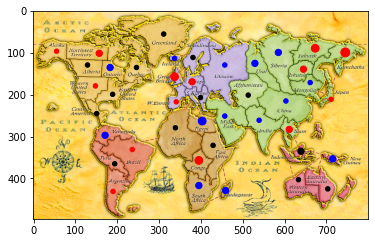

Current territories displayed as (territory, number of troops, [its neighbouring territories]):
('Alaska', 1, ['Alberta', 'Northwest Territory', 'Kamchatka'])
('Northwest Territory', 2, ['Alaska', 'Alberta', 'Greenland', 'Ontario'])
('Western United States', 1, ['Alberta', 'Central America', 'Eastern United States', 'Ontario'])
('Argentina', 1, ['Brazil', 'Peru'])
('Brazil', 1, ['Argentina', 'Peru', 'Venezuela', 'North Africa'])
('Great Britain', 3, ['Iceland', 'Northern Europe', 'Scandinavia', 'Western Europe'])
('Northern Europe', 2, ['Great Britain', 'Scandinavia', 'Southern Europe', 'Ukraine', 'Western Europe'])
('Western Europe', 1, ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'])
('Congo', 3, ['East Africa', 'North Africa', 'South Africa'])
('Irkutsk', 2, ['Kamchatka', 'Mongolia', 'Siberia', 'Yakutsk'])
('Japan', 1, ['Kamchatka', 'Mongolia'])
('Kamchatka', 4, ['Alaska', 'Irkutsk', 'Japan', 'Mongolia', 'Yakutsk'])
('Siam ', 2, ['China', 'India', 'Indonesia'

In [ ]:
game()

## code Test area

In [ ]:
territory_occupation={1: [1, 12], 2: [2, 1], 3: [1, 4], 4: [1, 1], 5: [1, 1], 6: [1, 1], 7: [1, 1], 8: [1, 1], 9: [1, 1], 10: [1, 1], 11: [1, 1], 12: [1, 1], 13: [1, 1], 14: [1, 1], 15: [1, 1], 16: [1, 1], 17: [1, 1], 18: [1, 1], 19: [1, 1], 20: [1, 1], 21: [1, 1], 22: [1, 1], 23: [1, 1], 24: ['', 0], 25: [1, 1], 26: [1, 1], 27: [1, 1], 28: [1, 1], 29: [1, 1], 30: [1, 1], 31: [1, 1], 32: [1, 1], 33: [2, 1], 34: ['', 0], 35: [1, 1], 36: [1, 11], 37: ['', 0], 38: ['', 0], 39: ['', 0], 40: ['', 0], 41: ['', 0], 42: ['', 0]}

In [ ]:
visualize_map()

In [ ]:
Ducky=Player(1, "Ducky")
Sloth=Player(2, "Sloth")
Player.lst_player=[Ducky, Sloth]

In [ ]:
turn(Ducky)